- scipy.ndimage: https://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html
- scikit-image: http://scikit-image.org/docs/stable/
- opencv: https://docs.opencv.org/3.3.1/index.html
- PIL: http://pillow.readthedocs.io/en/latest/, https://pillow.readthedocs.io/en/3.0.x/reference/index.html

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
import scipy.ndimage as ndi
from skimage.io import imread, imsave
import PIL
import matplotlib.image as mpimg
img = "assets/panda.jpg"
import skimage.data
import skimage

### load image

In [2]:
cv_frame = cv2.imread(img)
skimage_arr = imread(img) # based on PIL
scimg_arr = ndi.imread(img) # based on PIL
mpimg_arr = mpimg.imread(img) # based on PIL
pil_arr = PIL.Image.open(img)

In [3]:
assert np.all(skimage_arr == scimg_arr)
assert np.all(scimg_arr == mpimg_arr)
assert np.all(mpimg_arr == pil_arr)

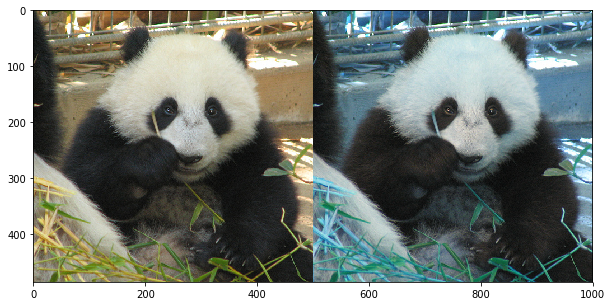

In [4]:
plt.imshow(np.concatenate((pil_arr, cv_frame), axis = 1))
plt.show()

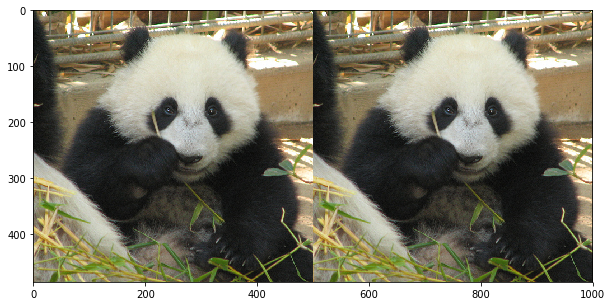

In [5]:
plt.imshow(np.concatenate((pil_arr, cv2.cvtColor(cv_frame, cv2.COLOR_BGR2RGB)), axis = 1))
plt.show()

In [9]:
cv2.imwrite("/Users/user/Desktop/pandas.jpg", cv2.cvtColor(cv2.cvtColor(cv_frame, cv2.COLOR_BGR2RGB), cv2.COLOR_RGB2BGR))

True

### Watershed algorithm

- step1: [represent the summary of euclidean distance to background](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.morphology.distance_transform_edt.html#scipy.ndimage.morphology.distance_transform_edt)
- step2: [extract the peak value, which is the local maxima in a particular region](http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.peak_local_max)
- step3: start from the lowest (-peak) value, based on the distance (gradient) to pull water till overflow, [scikit-image api](http://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.watershed)

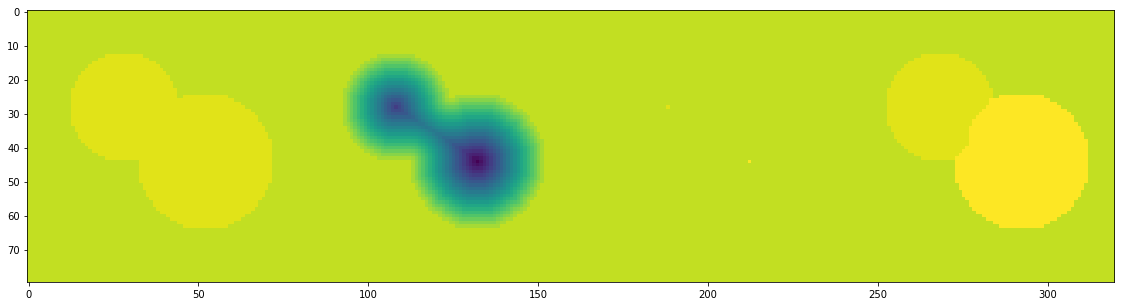

In [98]:
# generate a binary image with two overlap cycle area
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# step1
from scipy import ndimage as ndi
distance = ndi.distance_transform_edt(image)

# step2
from skimage.feature import peak_local_max
local_maxi = peak_local_max(distance, labels=image,
                            footprint=np.ones((3, 3)),
                            indices=False)
markers = ndi.label(local_maxi)[0]

# step3
labels = watershed(-distance, markers, mask=image)
plt.imshow(np.concatenate((image, -distance, markers ,labels), axis=1))
plt.show()

### connection
- scikit-image: http://scikit-image.org/docs/dev/api/skimage.morphology.html#label
- opencv solution: https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connected-components-with-stats-in-python
- twp-pass algorith: http://aishack.in/tutorials/labelling-connected-components-example/

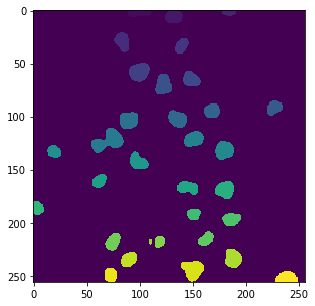

In [135]:
from skimage.morphology import label
img_arr = imread("assets/mask.png")
labels = label(img_arr, connectivity=1)
plt.imshow(labels)
plt.show()

In [136]:
# https://stackoverflow.com/questions/27014207/failure-to-use-adaptivethreshold-cv-8uc1-in-function-adaptivethreshold
src = cv2.imread('assets/mask.png', 0)
# # src = src.astype(float)
# # Threshold it so it becomes binary
# ret, thresh = cv2.threshold(src,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # You need to choose 4 or 8 for connectivity type
# connectivity = 4  
# # Perform the operation
# output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# # Get the results
# # The first cell is the number of labels
# num_labels = output[0]
# # The second cell is the label matrix
# labels = output[1]
# # The third cell is the stat matrix
# stats = output[2]
# # The fourth cell is the centroid matrix
# centroids = output[3]

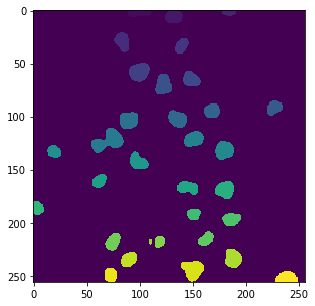

In [137]:
plt.imshow(labels)
plt.show()

### draw rectangle

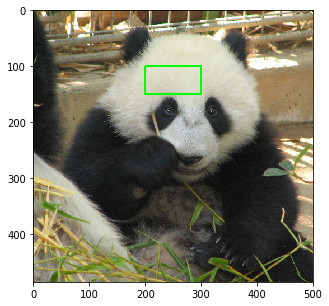

In [73]:
def draw_rectangle_cv(img, row, col, H, W, color):
    """
    draw rectangle to a new image array
    param:
    - img, ndarray
    - row, start pixel row
    - col, start pixel column
    - H, line height
    - W, line width
    """
    new_img = img.copy()
    cv2.rectangle(new_img, (col, row), (col + W, row + H), color, 2)
    return new_img
plt.imshow(draw_rectangle_cv(skimage_arr, 100, 200, 50, 100, [0, 255, 0]))
plt.show()

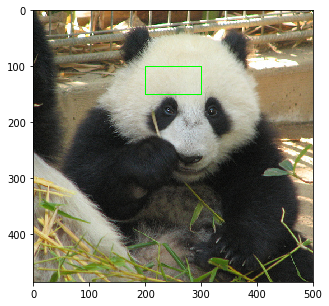

In [71]:
from skimage.draw import line as draw_line
def draw_rectangle(img, row, col, H, W, color):
    """
    draw rectangle to a new image array
    param:
    - img, ndarray
    - row, start pixel row
    - col, start pixel column
    - H, line height
    - W, line width
    """
    line1 = draw_line(row, col, row, col + W)
    line2 = draw_line(row, col, row + H, col)
    line3 = draw_line(row + H, col, row + H, col + W)
    line4 = draw_line(row, col + W, row + H, col + W)
    new_img = img.copy()
    new_img[line1] = color
    new_img[line2] = color
    new_img[line3] = color
    new_img[line4] = color
    return new_img
plt.imshow(draw_rectangle(skimage_arr, 100, 200, 50, 100, [0, 255, 0]))
plt.show()

### Resize

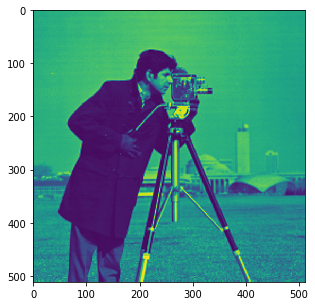

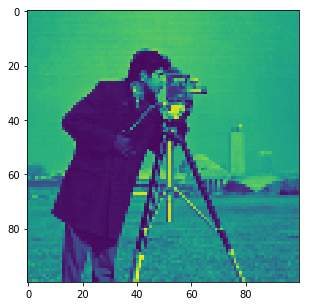

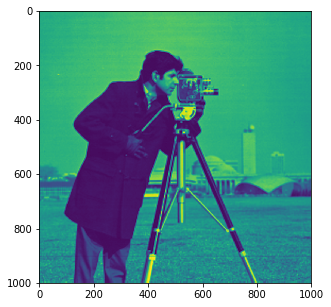

In [5]:
from skimage import data
from skimage.transform import resize
image = data.camera()
plt.imshow(image)
plt.show()
plt.imshow(resize(image, (100, 100), mode='reflect'))
plt.show()
plt.imshow(resize(image, (1000, 1000), mode='wrap'))
plt.show()

### Extract EXIF information of image

In [21]:
import PIL.Image
import PIL.ExifTags

i = PIL.Image.open("assets/IMG_4698.JPG")
exif = {
    PIL.ExifTags.TAGS[k]: v
    for k, v in i._getexif().items()
    if k in PIL.ExifTags.TAGS
}

exif

{'ApertureValue': (2159, 1273),
 'BrightnessValue': (16979, 1845),
 'ColorSpace': 1,
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'DateTime': '2018:03:31 17:35:54',
 'DateTimeDigitized': '2018:03:31 17:35:54',
 'DateTimeOriginal': '2018:03:31 17:35:54',
 'ExifImageHeight': 3024,
 'ExifImageWidth': 4032,
 'ExifOffset': 218,
 'ExifVersion': b'0221',
 'ExposureBiasValue': (0, 1),
 'ExposureMode': 0,
 'ExposureProgram': 2,
 'ExposureTime': (1, 863),
 'FNumber': (9, 5),
 'Flash': 16,
 'FlashPixVersion': b'0100',
 'FocalLength': (399, 100),
 'FocalLengthIn35mmFilm': 28,
 'GPSInfo': {1: 'N',
  2: ((35, 1), (30, 1), (4599, 100)),
  3: 'E',
  4: ((138, 1), (46, 1), (224, 100)),
  5: b'\x00',
  6: (59381, 71),
  7: ((8, 1), (35, 1), (52, 1)),
  12: 'K',
  13: (17, 100),
  16: 'T',
  17: (40171, 213),
  23: 'T',
  24: (40171, 213),
  29: '2018:03:31',
  31: (5, 1)},
 'ISOSpeedRatings': 20,
 'LensMake': 'Apple',
 'LensModel': 'iPhone 7 back camera 3.99mm f/1.8',
 'LensSpecification': ((399, 1

### Edge detection

- source code: https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py
>Different operators compute different finite-difference approximations of the gradient. 

```python
def sobel(image, mask=None):
    out = np.sqrt(sobel_h(image, mask)**2 + sobel_v(image, mask)**2)
    out /= np.sqrt(2)
    return out


def sobel_h(image, mask=None):
    """
    Notes
    -----
    We use the following kernel::
      1   2   1
      0   0   0
     -1  -2  -1
    """
    assert_nD(image, 2)
    image = img_as_float(image)
    result = convolve(image, HSOBEL_WEIGHTS)
    return _mask_filter_result(result, mask)


def sobel_v(image, mask=None):
    """
    We use the following kernel::
      1   0  -1
      2   0  -2
      1   0  -1
    """
    assert_nD(image, 2)
    image = img_as_float(image)
    result = convolve(image, VSOBEL_WEIGHTS)
    return _mask_filter_result(result, mask)
```

In [4]:
from  import camera
image = camera()

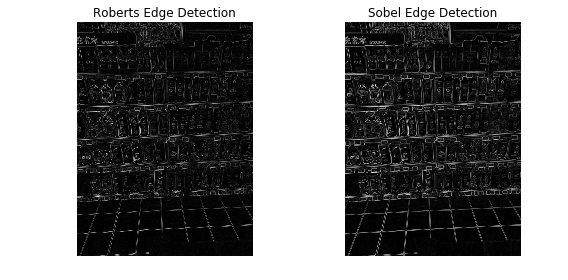

In [8]:
from skimage.filters import roberts, sobel, scharr, prewitt

image = imread("assets/12389.jpg")[:,:,0]
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

### Mean filter

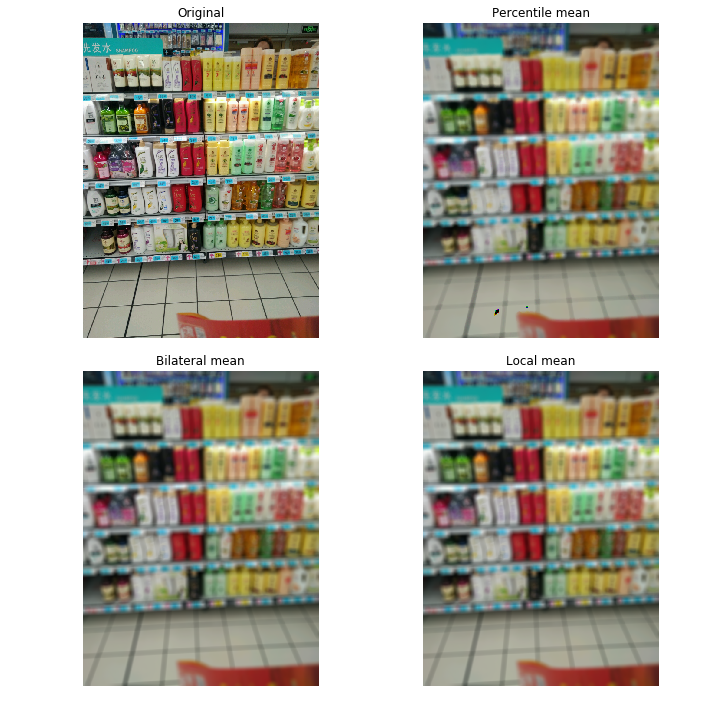

In [17]:
# http://scikit-image.org/docs/stable/auto_examples/filters/plot_rank_mean.html
from skimage.morphology import disk
from skimage.filters import rank

origin_image = imread("assets/12389.jpg")
percentile_result_l = []
bilateral_result_l = []
normal_result_l = []
for i in range(3):
    image = origin_image[:, :, i]
    selem = disk(10)
    percentile_result_l.append(rank.mean_percentile(image, selem=selem, p0=.1, p1=.9))
    bilateral_result_l.append(rank.mean_bilateral(image, selem=selem, s0=500, s1=500))
    normal_result_l.append(rank.mean(image, selem=selem))

percentile_result = np.stack(percentile_result_l, axis=-1)
bilateral_result = np.stack(bilateral_result_l, axis=-1)
normal_result = np.stack(normal_result_l, axis=-1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)
ax = axes.ravel()

titles = ['Original', 'Percentile mean', 'Bilateral mean', 'Local mean']
imgs = [origin_image, percentile_result, bilateral_result, normal_result]
for n in range(0, len(imgs)):
    ax[n].imshow(imgs[n], cmap=plt.cm.gray)
    ax[n].set_title(titles[n])
    ax[n].axis('off')

plt.tight_layout()
plt.show()

### Straight line Hough transform

In [3]:
hough_line?

Signature: hough_line(img, theta=None)
Docstring:
Perform a straight line Hough transform.

Parameters
----------
img : (M, N) ndarray
    Input image with nonzero values representing edges.
theta : 1D ndarray of double, optional
    Angles at which to compute the transform, in radians.
    Defaults to a vector of 180 angles evenly spaced from -pi/2 to pi/2.

Returns
-------
hspace : 2-D ndarray of uint64
    Hough transform accumulator.
angles : ndarray
    Angles at which the transform is computed, in radians.
distances : ndarray
    Distance values.

Notes
-----
The origin is the top left corner of the original image.
X and Y axis are horizontal and vertical edges respectively.
The distance is the minimal algebraic distance from the origin
to the detected line.
The angle accuracy can be improved by decreasing the step size in
the `theta` array.

Examples
--------
Generate a test image:

>>> img = np.zeros((100, 150), dtype=bool)
>>> img[30, :] = 1
>>> img[:, 65] = 1
>>> img[35:45, 3

In [4]:
h.shape, theta.shape, d.shape

((284, 180), (180,), (284,))

In [8]:
np.log(1 + h).shape

(284, 180)

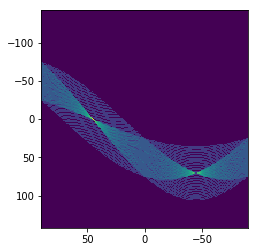

In [12]:
plt.imshow(np.log(1 + h),
           extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
              aspect=1/1.5)
plt.show()

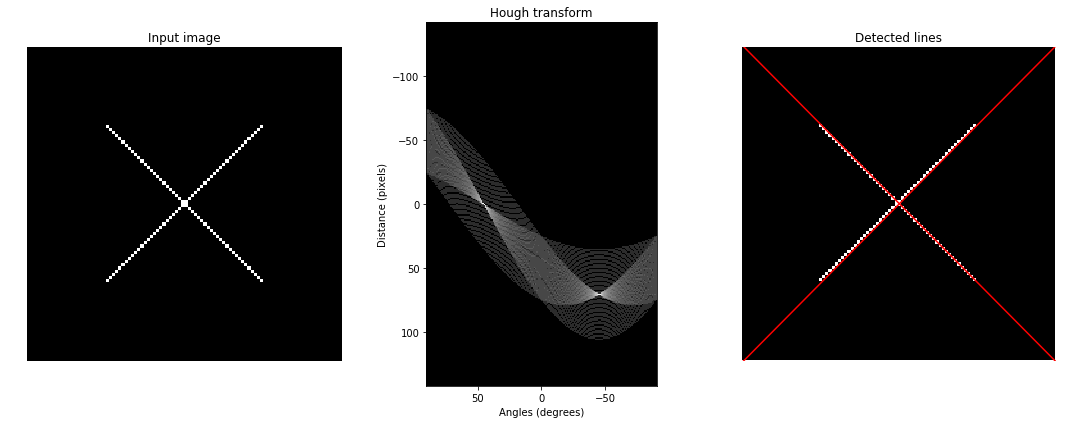

/Users/user/anaconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


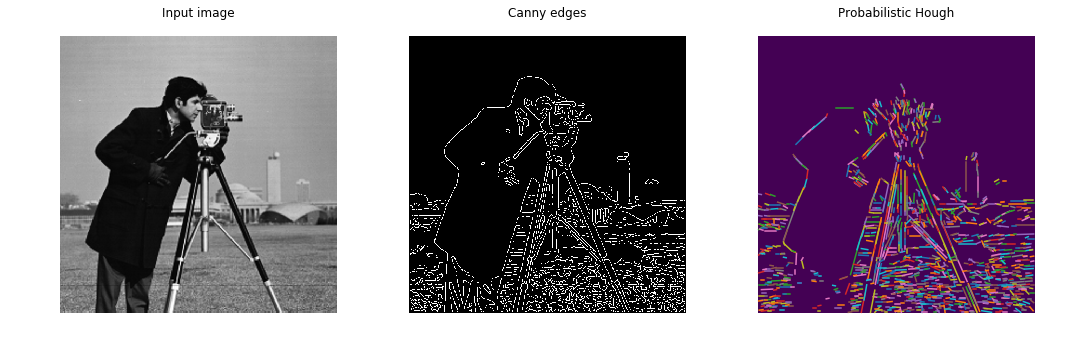

In [2]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

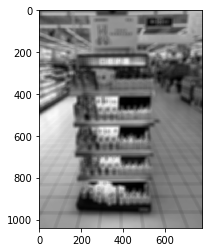

In [25]:
image = imread("assets/planogram.jpeg")[:, : , 0]

from skimage.filters import rank
from skimage.morphology import disk
bilateral_result_l = []
for i in range(3):
    bilateral_result_l.append(rank.mean_bilateral(image, selem=disk(10), s0=500, s1=500))
bilateral_result = np.stack(bilateral_result_l, axis=-1)
plt.imshow(bilateral_result)
plt.show()

/Users/user/anaconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


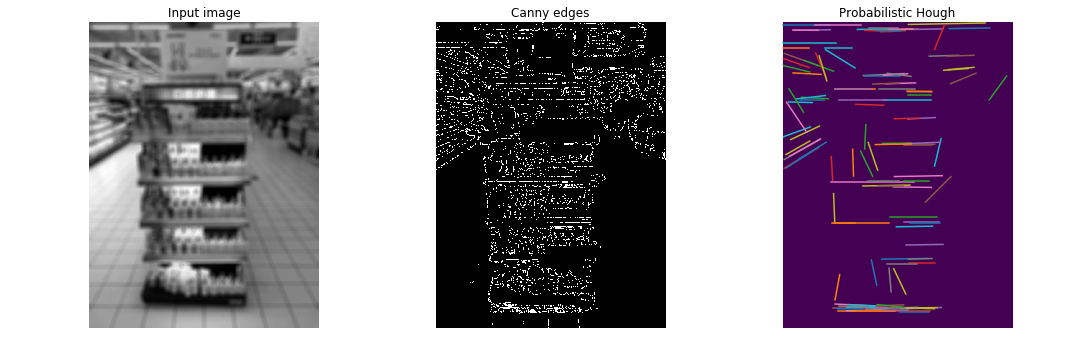

In [33]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

from skimage.io import imread, imsave

# Line finding using the Probabilistic Hough Transform
# image = data.camera()
image = bilateral_result[:, :, 0]
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=80, line_gap=10)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()